In [31]:
# Import Modules
import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt


In [32]:
# Load .env environment variables into the notebook
load_dotenv()

True

In [33]:
# Get the API key from the environment variable and store as Python variable
quandl_api_key = os.getenv("QUANDL_API_KEY")


In [34]:
# Using Manitoba Canada for the province code
# coins = ["BTC", "ETH"]

start_date = "2022-01-01"
end_date = "2022-03-01"

# url = f"https://www.quandl.com/api/v3/datasets/CMHC/HPPU50_{province}?start_date={start_date}&end_date={end_date}&api_key={quandl_api_key}"
url = f"https://data.nasdaq.com/api/v3/datasets/BITFINEX/LUNAF0USTF0?start_date={start_date}&end_date={end_date}&api_key={quandl_api_key}"


In [35]:
# Get and store response
response = requests.get(url).json()

In [36]:
# The response is of type dictionary
type(response)

dict

In [20]:
# Print the response
print(response)

{'dataset': {'id': 50826885, 'dataset_code': 'LUNAF0USTF0', 'database_code': 'BITFINEX', 'name': 'LUN/AF0:USTF0 Exchange Rate', 'description': 'Exchange rates on BTIFinex exchange. Updated at 7:00pm EST.', 'refreshed_at': '2022-05-09T23:30:14.945Z', 'newest_available_date': '2022-05-09', 'oldest_available_date': '2021-08-26', 'column_names': ['Date', 'High', 'Low', 'Mid', 'Last', 'Bid', 'Ask', 'Volume'], 'frequency': None, 'type': 'Time Series', 'premium': False, 'limit': None, 'transform': None, 'column_index': None, 'start_date': '2021-08-26', 'end_date': '2022-05-09', 'data': [['2022-05-09', 65.273, 36.365, 37.7135, 37.838, 37.67, 37.757, 869715.89344476], ['2022-05-08', 70.376, 59.397, 64.141, 64.098, 64.123, 64.159, 349725.11276012], ['2022-05-07', 77.905, 62.682, 69.159, 69.142, 69.137, 69.181, 123361.34447491], ['2022-05-06', 82.999, 77.332, 78.0405, 78.063, 78.011, 78.07, 73673.12463427], ['2022-05-05', 87.789, 78.346, 82.326, 82.419, 82.305, 82.347, 87635.15103975], ['2022-05-

In [37]:
# json.dumps is a convenient method for printing dict/json objects
print(json.dumps(response, indent=3))

{
   "dataset": {
      "id": 50826885,
      "dataset_code": "LUNAF0USTF0",
      "database_code": "BITFINEX",
      "name": "LUN/AF0:USTF0 Exchange Rate",
      "description": "Exchange rates on BTIFinex exchange. Updated at 7:00pm EST.",
      "refreshed_at": "2022-05-10T23:30:27.091Z",
      "newest_available_date": "2022-05-10",
      "oldest_available_date": "2021-08-26",
      "column_names": [
         "Date",
         "High",
         "Low",
         "Mid",
         "Last",
         "Bid",
         "Ask",
         "Volume"
      ],
      "frequency": null,
      "type": "Time Series",
      "premium": false,
      "limit": null,
      "transform": null,
      "column_index": null,
      "start_date": "2022-01-01",
      "end_date": "2022-03-01",
      "data": [
         [
            "2022-03-01",
            94.901,
            86.218,
            88.0875,
            88.198,
            88.048,
            88.127,
            263493.60345063
         ],
         [
          

In [52]:
# Access the third element of the first list inside `data`
the_data_df = response["dataset"]["data"]

In [53]:
# Get list of column names
the_column_names = response["dataset"]["column_names"]


In [54]:
# Empty list to hold the series
the_list_series = []

# Convert each row to a series and append to the list
for row in response["dataset"]["data"]:
    the_list_series.append(pd.Series(row))

# Create Dataframe
the_data_df = pd.DataFrame(data=the_list_series)


In [55]:
# Store column names
display(column_names)
the_data_df.columns = column_names

['Date', 'High', 'Low', 'Mid', 'Last', 'Bid', 'Ask', 'Volume']

In [56]:
# Show DataFrame
len(the_data_df)

60

<AxesSubplot:title={'center':'Prices for Something'}, xlabel='Date'>

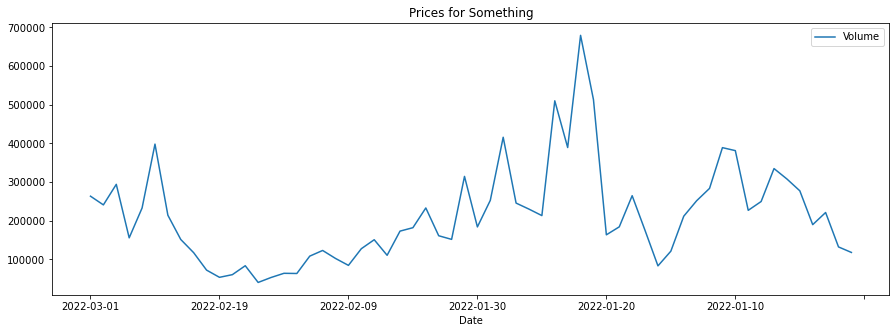

In [57]:
# Display scatter plot
the_data_df.plot(figsize=(15,5), kind="line",
    x="Date", y="Volume", title="Prices for Something"
)


In [ ]:
## Okay now the hvplot stuff...

